In [11]:
from sklearn.linear_model.stochastic_gradient import SGDClassifier
from skmultiflow.meta.multi_output_learner import MultiOutputLearner
from skmultiflow.core.pipeline import Pipeline
from skmultiflow.data.multilabel_generator import MultilabelGenerator
from skmultiflow.evaluation.evaluate_prequential import EvaluatePrequential
%matplotlib notebook


    This demo shows the evaluation process of a MOL classifier, initialized 
    with sklearn's SGDClassifier.

In [12]:
# Setup the File Stream
stream = MultilabelGenerator(n_samples=50000)

In [13]:
# Setup the classifier
classifier = MultiOutputLearner(SGDClassifier(n_iter_no_change=100))

In [14]:
# Setup the pipeline
pipe = Pipeline([('Classifier', classifier)])

In [15]:
evaluator = EvaluatePrequential(pretrain_size=5000, max_samples=40000, batch_size=1, n_wait=200,
                                max_time=1000, output_file='test_prequential_mol.csv', show_plot=True,
                                metrics=['hamming_score', 'j_index', 'exact_match'])

<IPython.core.display.Javascript object>


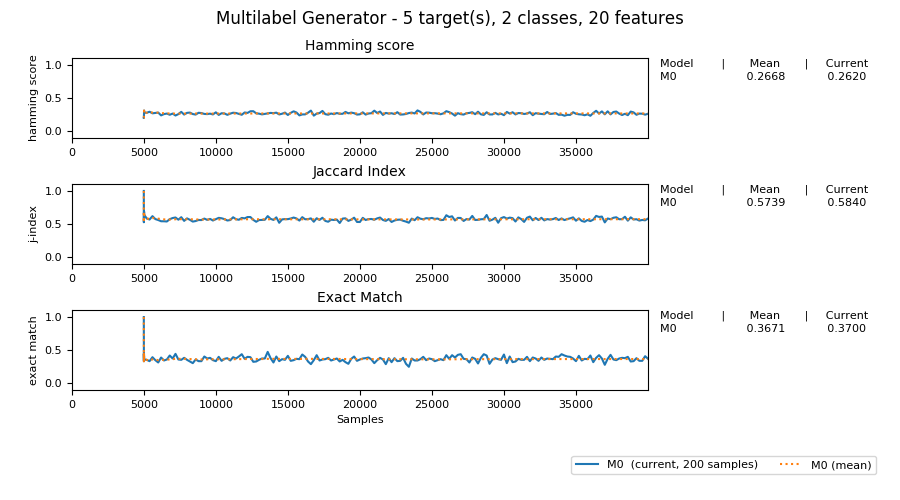

Prequential Evaluation
Evaluating 5 target(s).
Pre-training on 5000 sample(s).


/home/ben/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/ben/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/ben/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/ben/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


Evaluating...
 #################### [100%] [104.10s]
Processed samples: 40000
Mean performance:
M0 - Hamming score: 0.2668
M0 - Exact matches: 0.3671
M0 - Jaccard index: 0.5739


[Pipeline(steps=[('Classifier',
                  MultiOutputLearner(base_estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None,
               early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
               l1_ratio=0.15, learning_rate='optimal', loss='hinge',
               max_iter=1000, n_iter_no_change=100, n_jobs=None, penalty='l2',
               power_t=0.5, random_state=None, shuffle=True, tol=0.001,
               validation_fraction=0.1, verbose=0, warm_start=False)))])]

In [16]:
# Evaluate
evaluator.evaluate(stream=stream, model=pipe)